In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

### Beam parameters

In [3]:
# number of sampling points
N = 2048
# photon energy in eV
E0 = 23880

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 23e-6,
    'sigma_y': 23e-6,
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 650-26
}

### Define beamline

In [4]:
# crystal asymmetry angle
alphaAsym = 27.98*np.pi/180


# crystal reflection hkl index
hkl = [6,6,0]

# initialize the beam
b1 = beam.Beam(beam_params=beam_params)

# viewing point upstream of monochromator
im0 = optics.PPM('im0', z=870, FOV=2e-3, N=256)
crl0 = optics.CRL('crl0', z=930, f=306, diameter=2e-3, E0=E0)

# first crystal: symmetric reflection
crystal1 = optics.Crystal('c1', hkl=[3,1,1], length=10e-2, width=20e-3, z=931, E0=E0,
                          alphaAsym=-6.8*np.pi/180, orientation=0, pol='s', delta=0.e-6)



# second crystal: asymmetric reflection, orientation flipped relative to crystal1
crystal2 = optics.Crystal('c2', hkl=[3,1,1], length=10e-2, width=20e-3, z=crystal1.z+.1, E0=E0,
                          alphaAsym=-6.8*np.pi/180, orientation=2,pol='s', delta=0e-6,shapeError=None)
# printing crystal incidence and reflection angles for confirmation
print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

im_upstream = optics.PPM('im_upstream', z=crystal2.z - .1, FOV=2e-3, N=256)

# third crystal, symmetric reflection, same orientation as crystal2
crystal3 = optics.Crystal('c3', hkl=[15,11,9], length=10e-2, width=10e-3, z=crystal2.z+.2, E0=E0,
                          alphaAsym=52.9*np.pi/180, orientation=2,pol='s')

# fourth crystal, asymmetric reflection, same orientation as crystal1
crystal4 = optics.Crystal('c4', hkl=[15,11,9], length=10e-2, width=10e-3, z=crystal3.z-.1, 
                          E0=E0,alphaAsym=-52.9*np.pi/180, orientation=0,pol='s', delta=.0e-6)

crystal5 = optics.Crystal('c5', hkl=[2,2,0], length=10e-2, width=10e-3, z=crystal3.z+.1,
                         E0=E0, alphaAsym=5.8*np.pi/180, orientation=0,pol='s')

crystal6 = optics.Crystal('c6', hkl=[2,2,0], length=10e-2, width=10e-3, z=crystal5.z+.1, E0=E0,
                         alphaAsym=5.8*np.pi/180, orientation=2,pol='s')

# viewing point just downstream of monochromator
im2 = optics.PPM('im2', z=crystal6.z+10, FOV=2e-3, N=256)

# list of devices to propagate through
devices = [im0,crl0,crystal1,crystal2,crystal3,crystal4,crystal5,crystal6, im2]
# devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices, ordered=True)

FWHM in x: 38.3817560828058 microns
FWHM in y: 38.3817560828058 microns
FWHM Divergence (x): 0.8 μrad
FWHM Divergence (y): 0.8 μrad
32.01018876296672
32.01018876296672
x is focused
y is focused
b 0.15
b 0.15
crystal 2 incidence angle: 2.32 degrees
crystal 2 exit angle: 15.92 degrees
b 1.53
b 0.65
b 6.81
b 6.81


In [5]:
print(crl0.roc)

0.00036549523014177865


In [6]:
crystals = [crystal1,crystal2,crystal3,crystal4,crystal5,crystal6]

for i in range(6):
    print('crystal {:d} incidence angle: {:.2f} degrees'.format(i+1,crystals[i].alpha*180/np.pi))
    print('crystal {:d} exit angle: {:.2f} degrees'.format(i+1,crystals[i].beta0*180/np.pi))
    print('crystal {:d} x position: {:.2f} m'.format(i+1,crystals[i].global_x))

crystal 1 incidence angle: 2.32 degrees
crystal 1 exit angle: 15.92 degrees
crystal 1 x position: 0.00 m
crystal 2 incidence angle: 2.32 degrees
crystal 2 exit angle: 15.92 degrees
crystal 2 x position: 0.03 m
crystal 3 incidence angle: 133.93 degrees
crystal 3 exit angle: 28.14 degrees
crystal 3 x position: 0.03 m
crystal 4 incidence angle: 28.13 degrees
crystal 4 exit angle: 133.92 degrees
crystal 4 x position: 0.00 m
crystal 5 incidence angle: 13.57 degrees
crystal 5 exit angle: 1.97 degrees
crystal 5 x position: 0.00 m
crystal 6 incidence angle: 13.57 degrees
crystal 6 exit angle: 1.97 degrees
crystal 6 x position: 0.03 m


### Propagation through monochromator at central photon energy

FWHM in x: 210.3306942653777 microns
FWHM in y: 210.3306942653777 microns
FWHM Divergence (x): 0.8 μrad
FWHM Divergence (y): 0.8 μrad
32.01018876296672
32.01018876296672
x is focused
y is focused
im0
zx: 246.000000
zy: 246.000000
azimuth 0.00 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
z intersect: 9.3000e+02
component z: 9.3000e+02
delta z: 0.00
zRx: 459784383.27 microns
zRy: 459784383.27 microns
remaining distance: 60000000.00 microns
goal for zx: 306000000.00 microns
current zx: 246000000.00 microns
goal for zy: 306000000.00 microns
current zy: 246000000.00 microns
zx: 306.000000
zy: 306.000000
azimuth 0.00 mrad
crl0
zRx: 1.14e+34
zRy: 2.00e+02
y becomes unfocused
focal length: 306.00
zx: 2305843009213693952.000000
zy: 306.000000
azimuth 0.00 mrad
drift2
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
z intersect: 9.3

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2445: RuntimeWarning: divide by zero encountered in double_scalars
  R = 1 / (2 * second_order*1e-9)


<IPython.core.display.Javascript object>


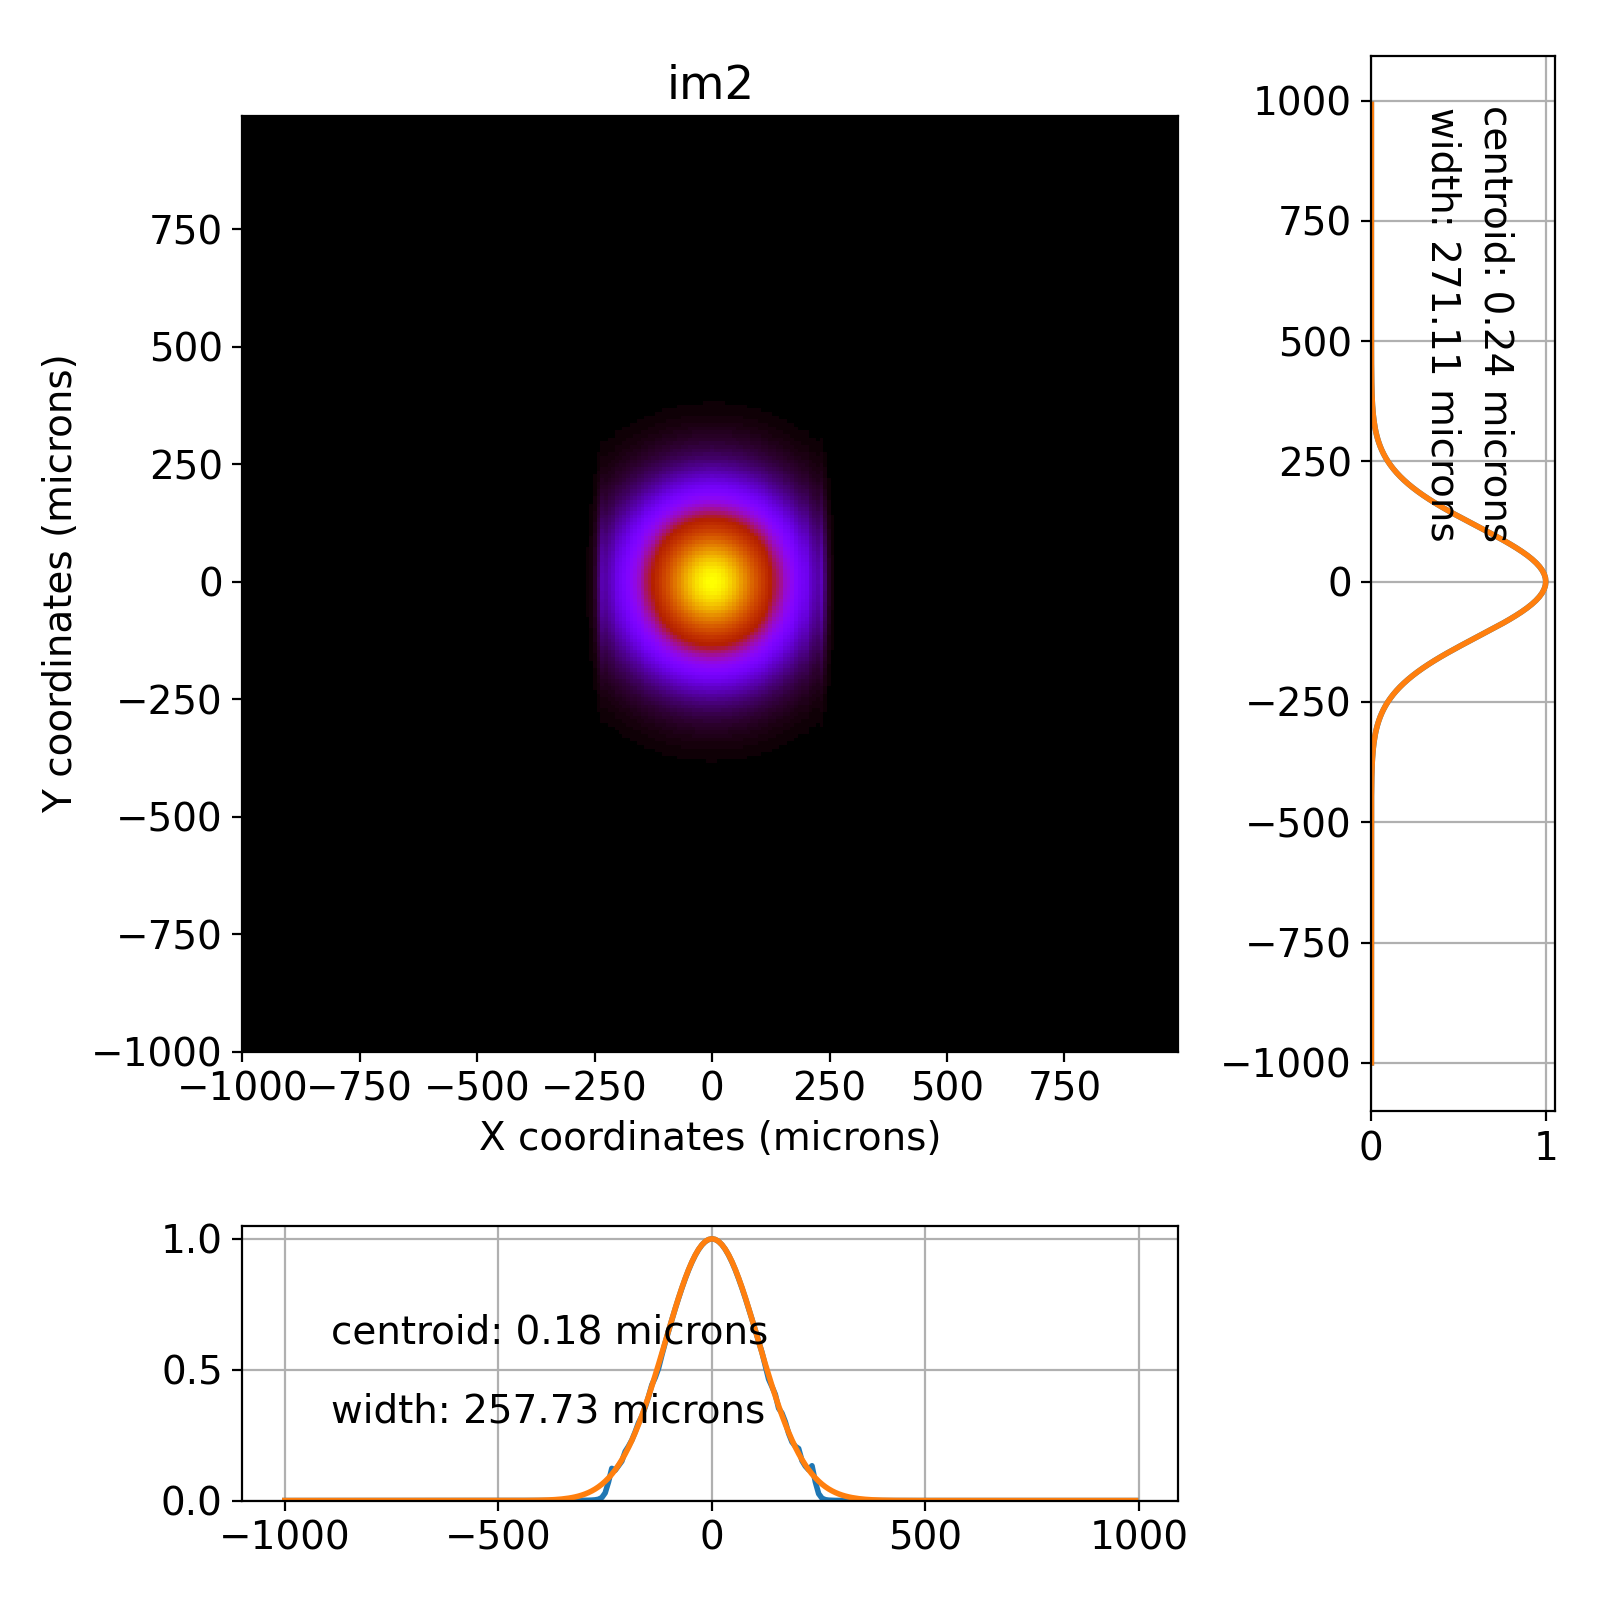

[<AxesSubplot:title={'center':'im2'}, xlabel='X coordinates (microns)', ylabel='Y coordinates (microns)'>,
 <AxesSubplot:>,
 <AxesSubplot:>]

In [7]:
# propagate
b2 = mono_beamline.propagate_beamline(b1)

# view beam at various locations

mono_beamline.im2.view_beam()

## Time-domain propagation

In [8]:
# # reset central photon energy
# beam_params['photonEnergy'] = 17795

# # initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
# pulse = beam.Pulse(beam_params=beam_params, tau=400, time_window=400000)

# print('Number of spectral components: {:d}'.format(pulse.N))

In [45]:
# reset central photon energy
beam_params['photonEnergy'] = 23880

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, unit_spectrum=True, spectral_width=.02, N=256)
# pulse = beam.Pulse(beam_params=beam_params,tau=200000,time_window=10000000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 256


In [46]:
%%capture capt
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im0','im2'])
# pulse.propagate(beamline=mono_beamline, screen_names=['imcrl','imc3'])

<IPython.core.display.Javascript object>


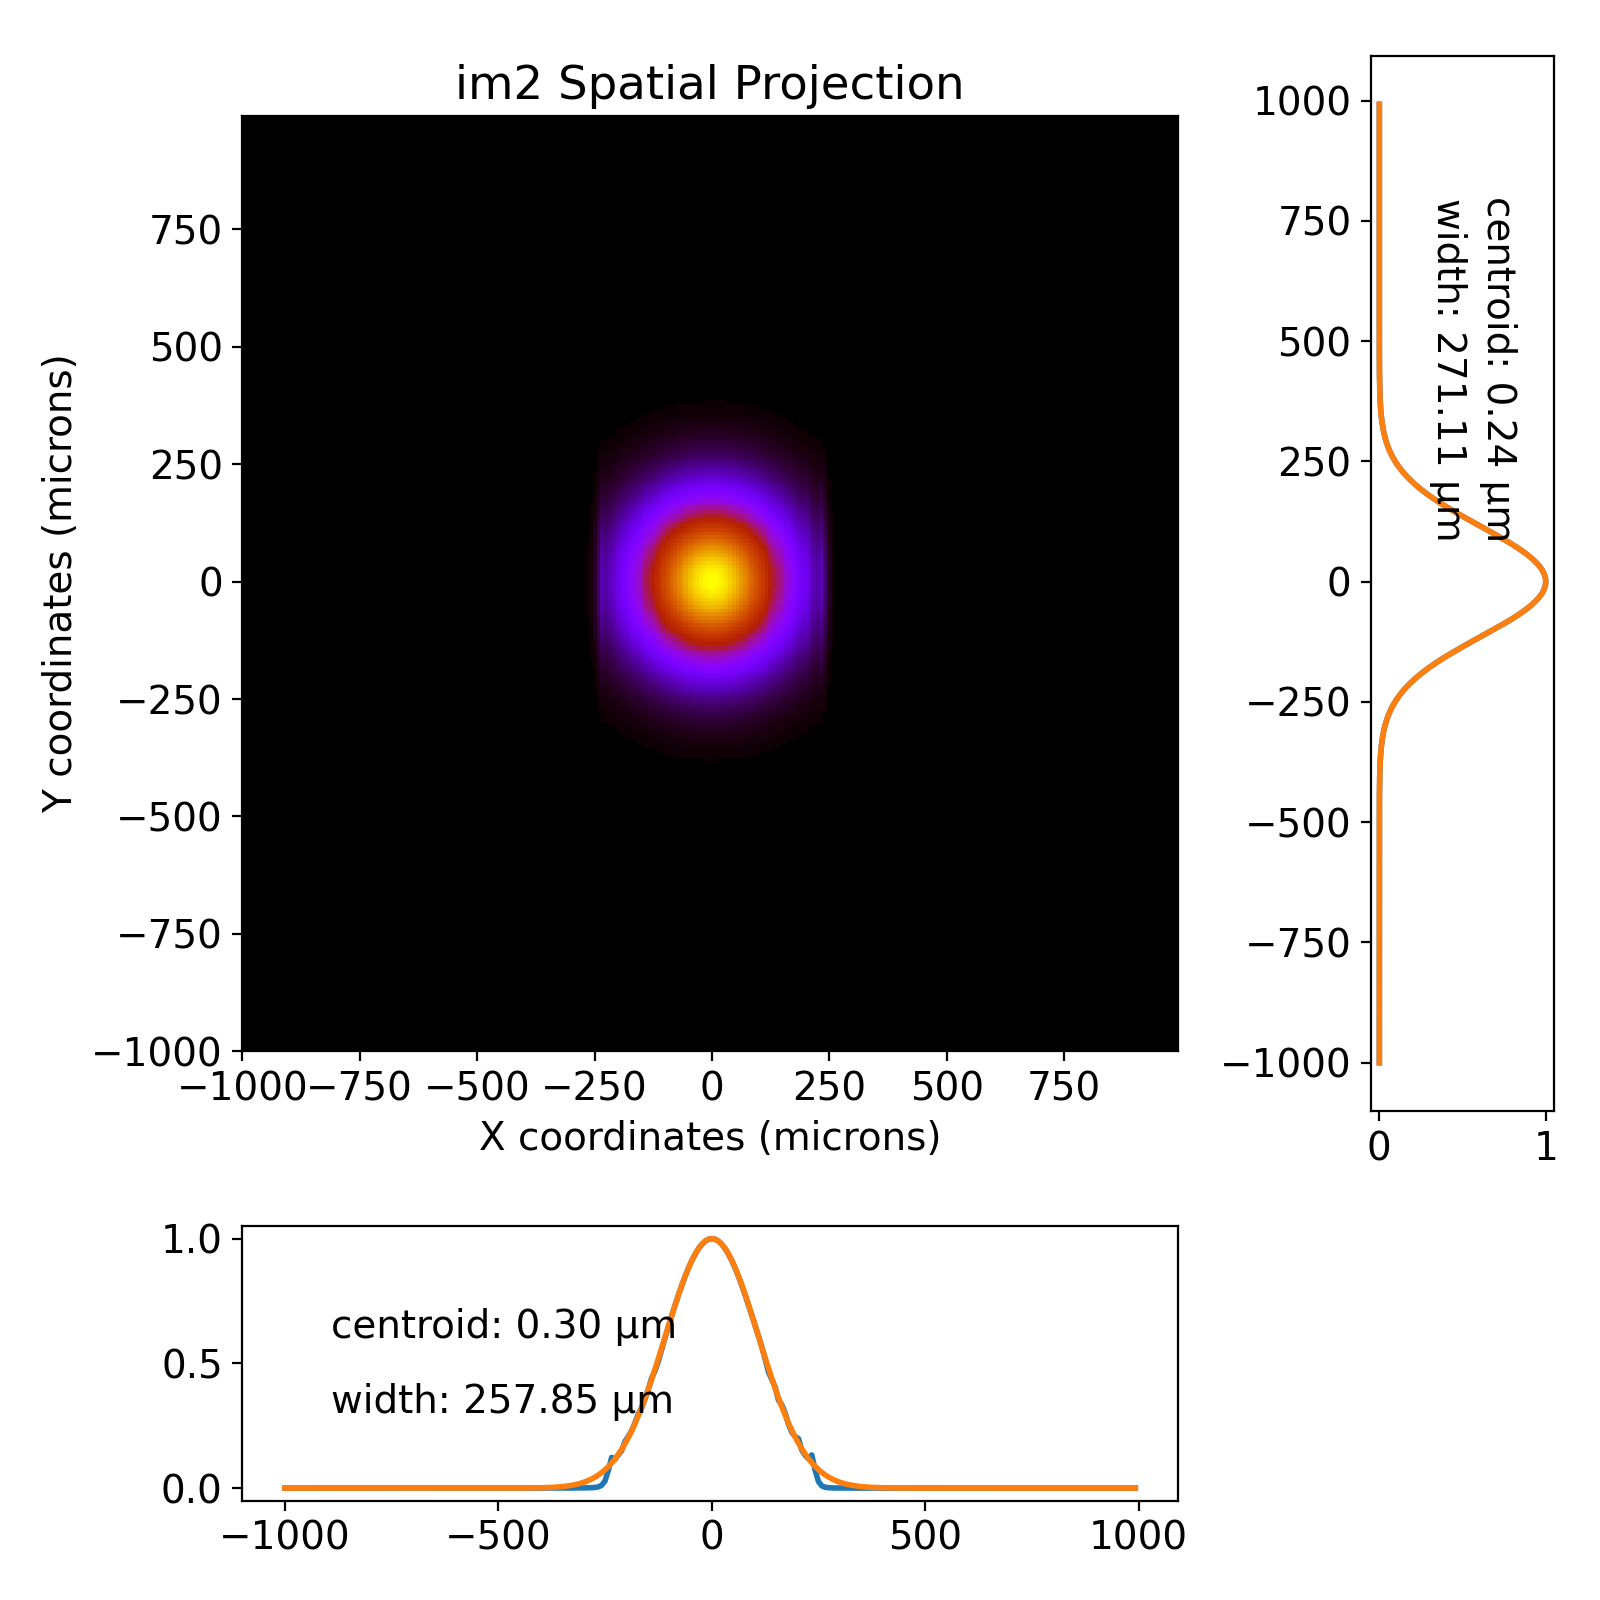

(<AxesSubplot:title={'center':'im2 Spatial Projection'}, xlabel='X coordinates (microns)', ylabel='Y coordinates (microns)'>,
 <AxesSubplot:>,
 <AxesSubplot:>)

In [47]:
pulse.imshow_projection('im2')


<IPython.core.display.Javascript object>


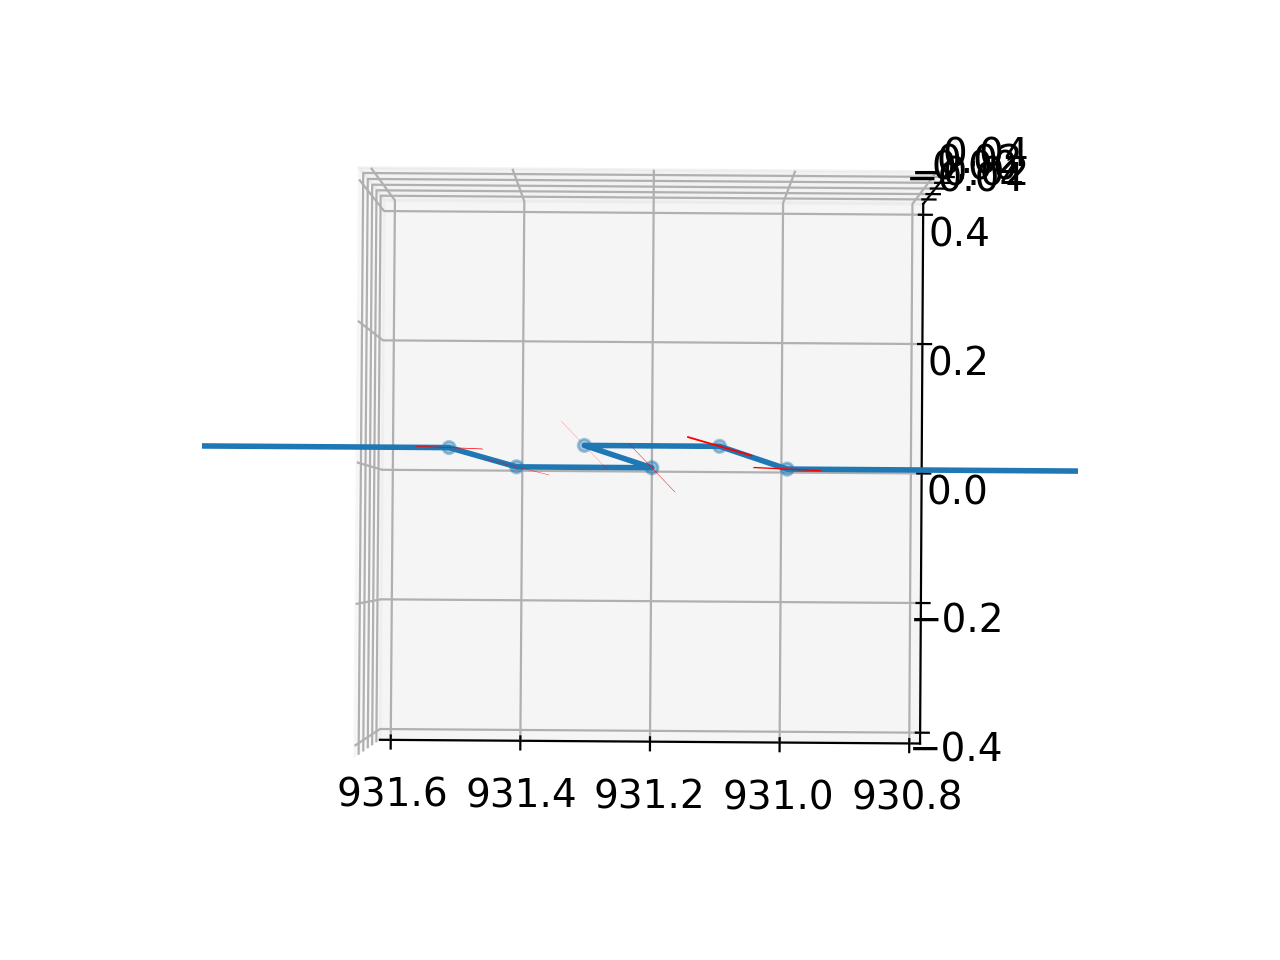

(<Axes3DSubplot:>,
 array([870. , 930. , 931. , 931.1, 931.3, 931.2, 931.4, 931.5, 941.5]))

In [9]:
mono_beamline.draw_beamline()

In [10]:
plt.xlim(931.6,930.8)
plt.ylim(-.4,.4)

(-0.4, 0.4)

### Visualize input

Fit failed. Using second moment for width.


/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/util.py:727: RuntimeWarning: invalid value encountered in true_divide
  norm_data = (y_data - np.min(y_data))/(np.max(y_data) - np.min(y_data))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/util.py:411: RuntimeWarning: invalid value encountered in less
  array_out[array_out < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/util.py:749: RuntimeWarning: invalid value encountered in greater
  mask = y_data_thresh > 0


<IPython.core.display.Javascript object>


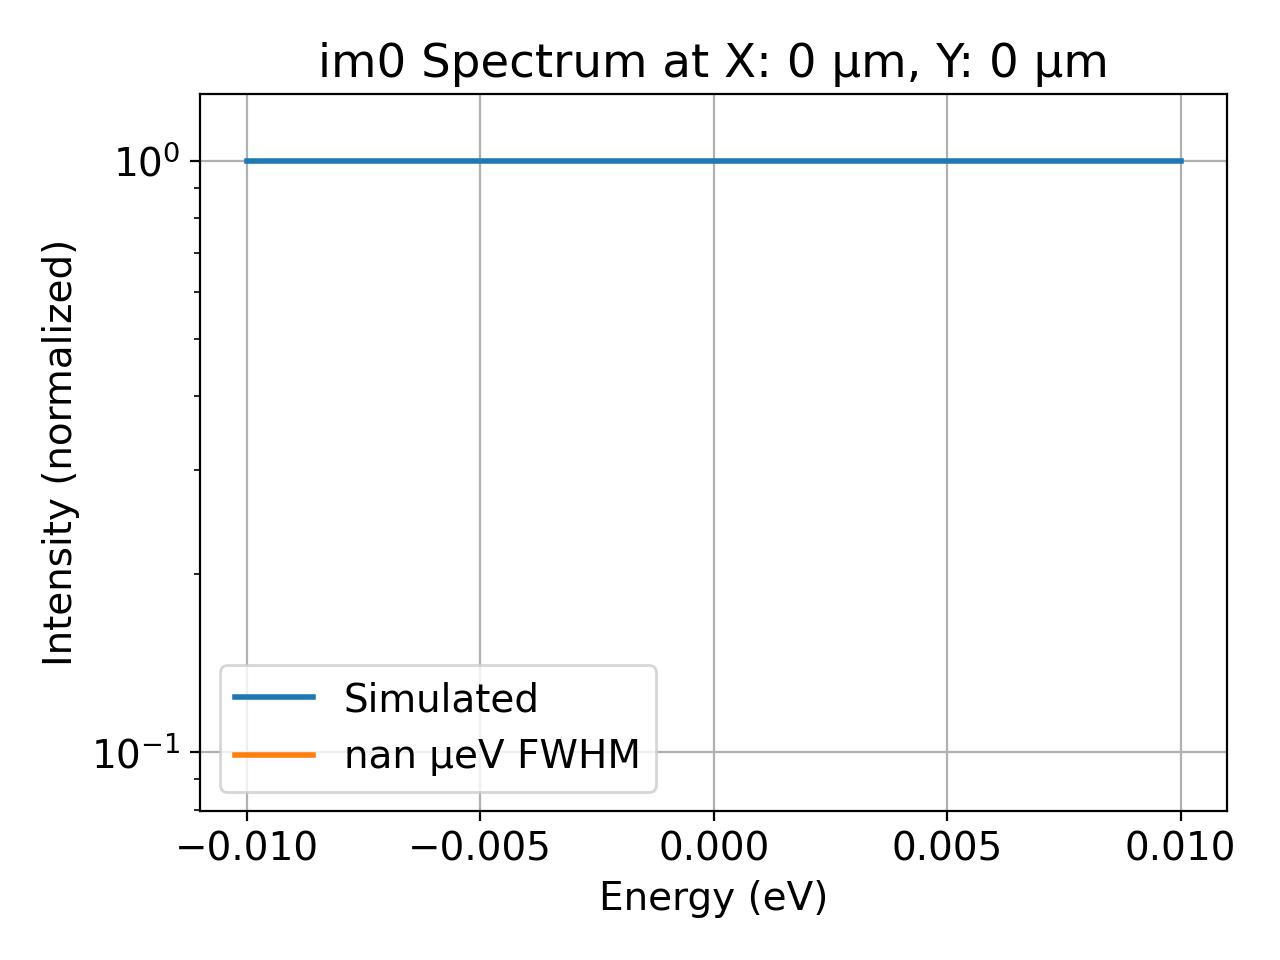

Fit failed. Using second moment for width.


/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1724: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-.05,1.3)


<IPython.core.display.Javascript object>


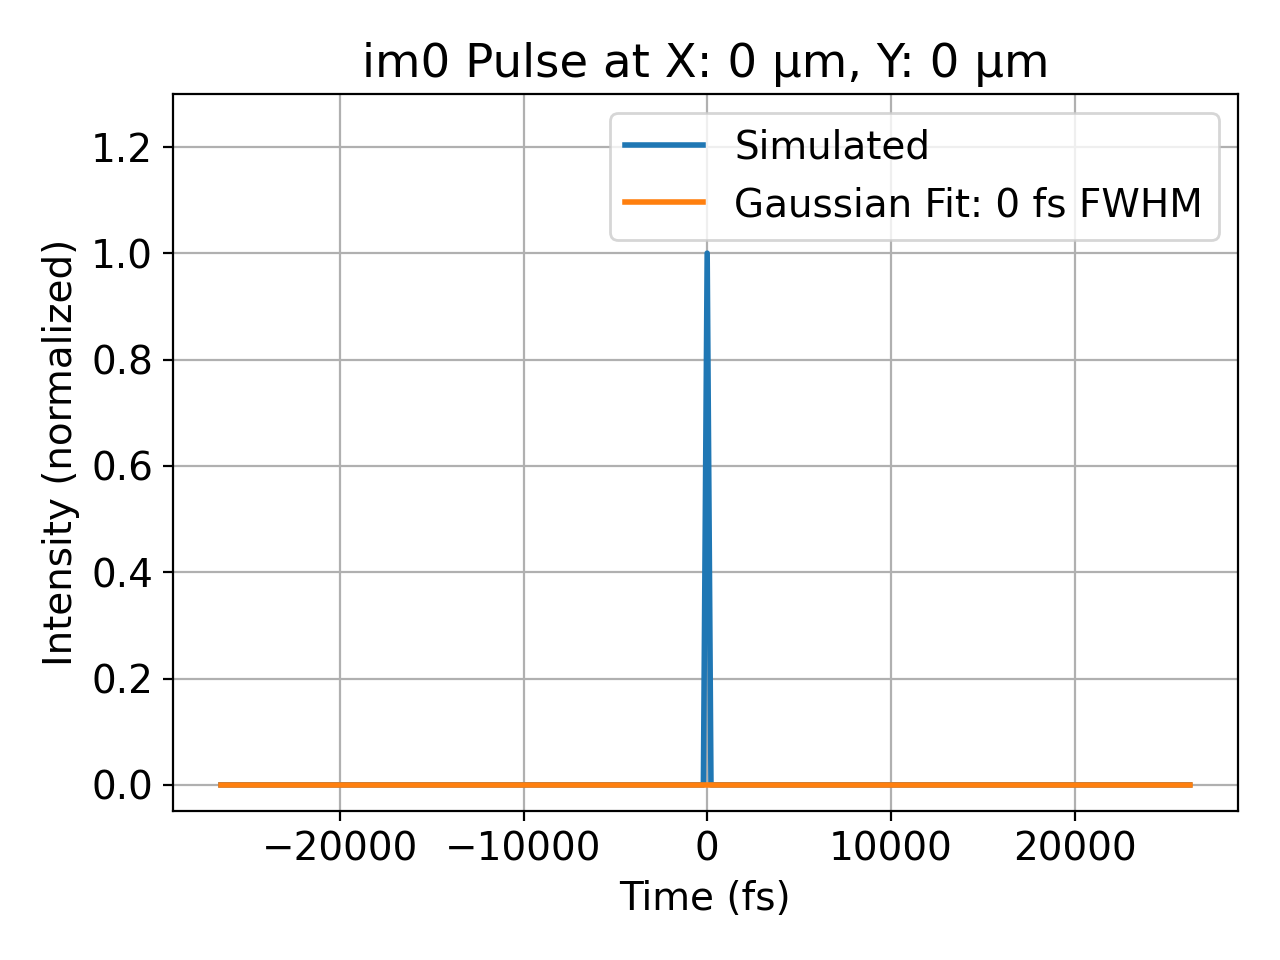

<IPython.core.display.Javascript object>


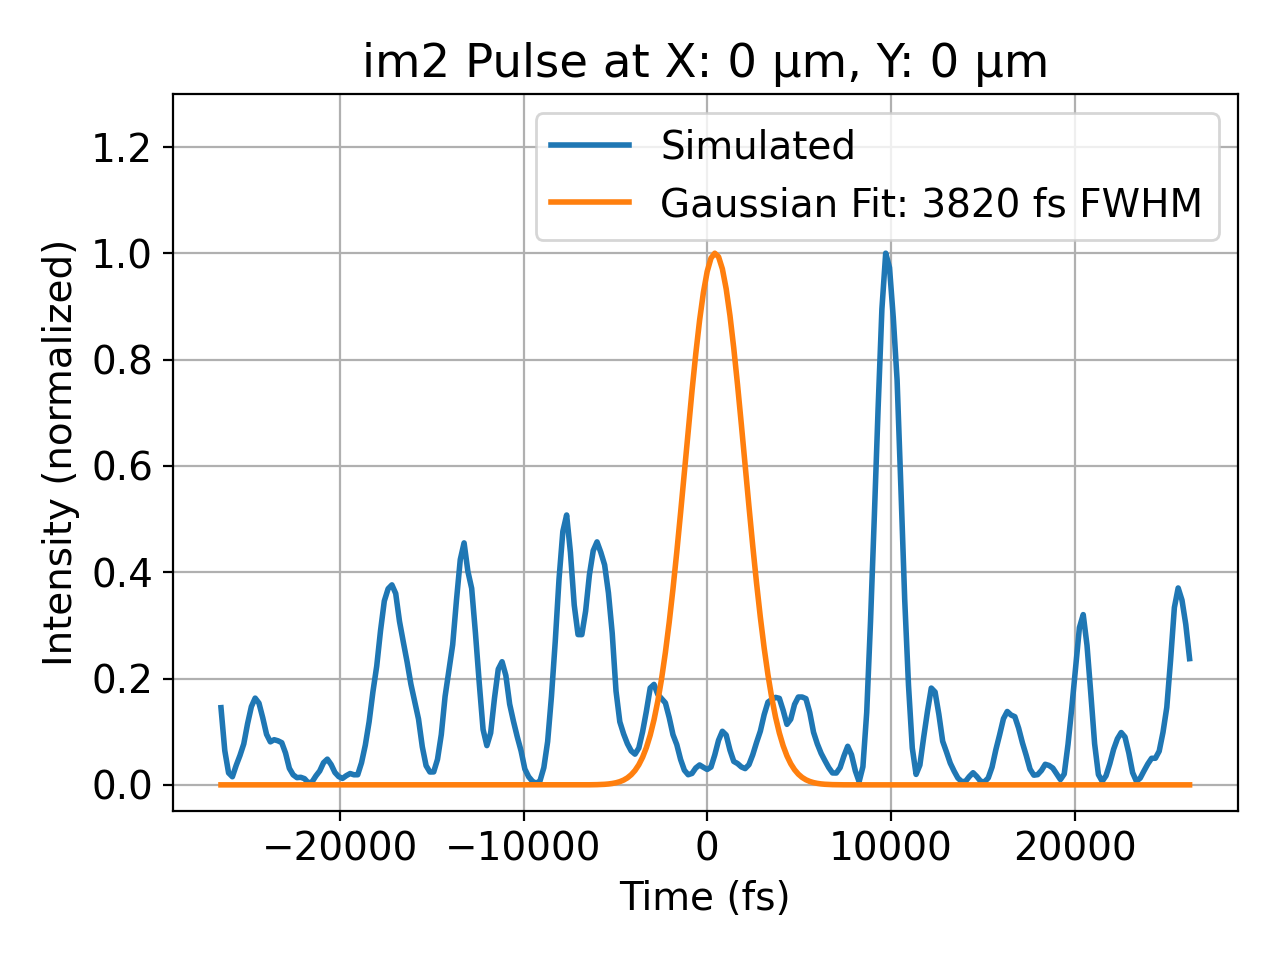

<IPython.core.display.Javascript object>


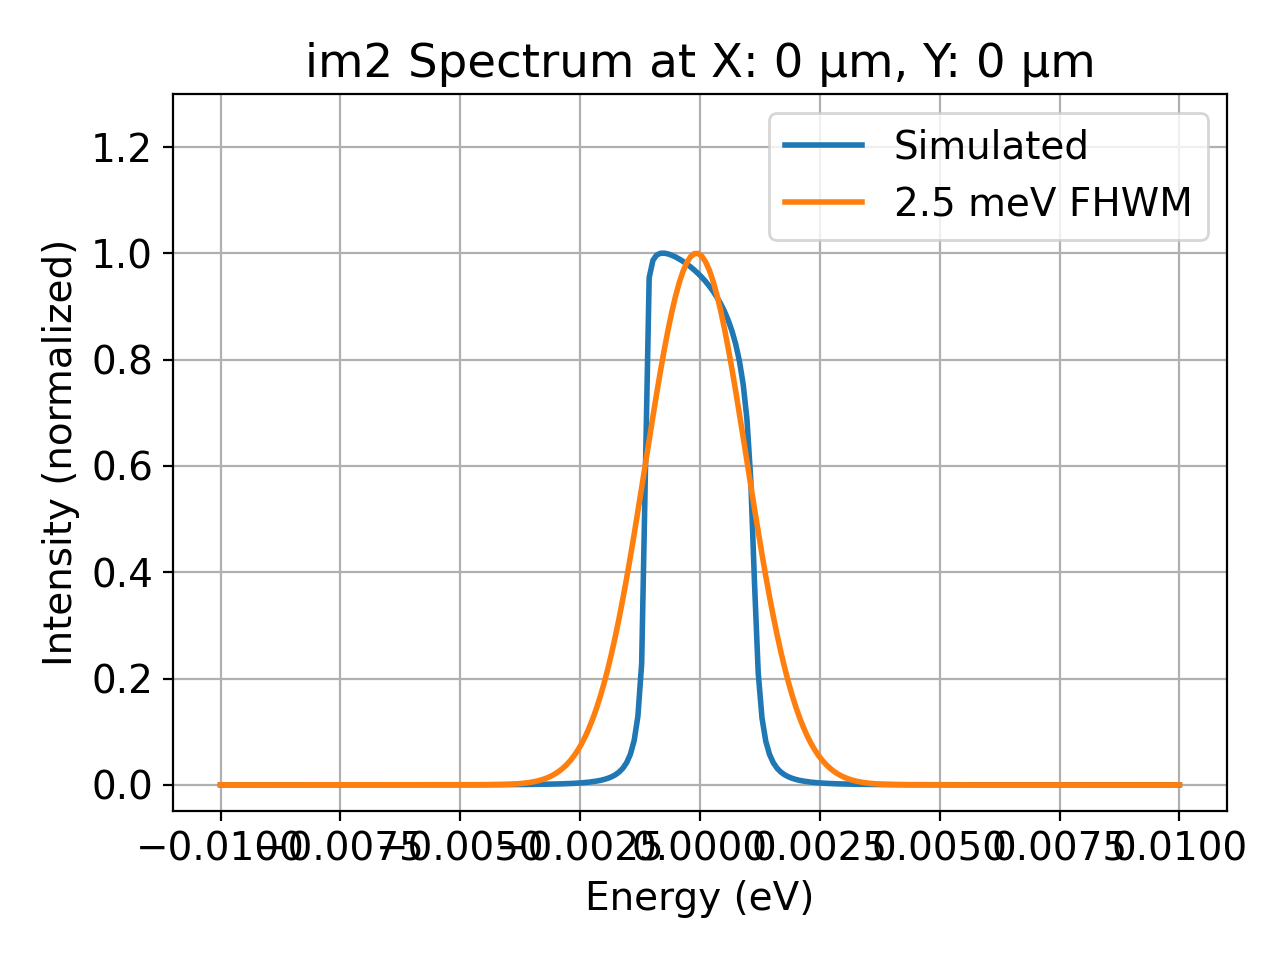

<IPython.core.display.Javascript object>


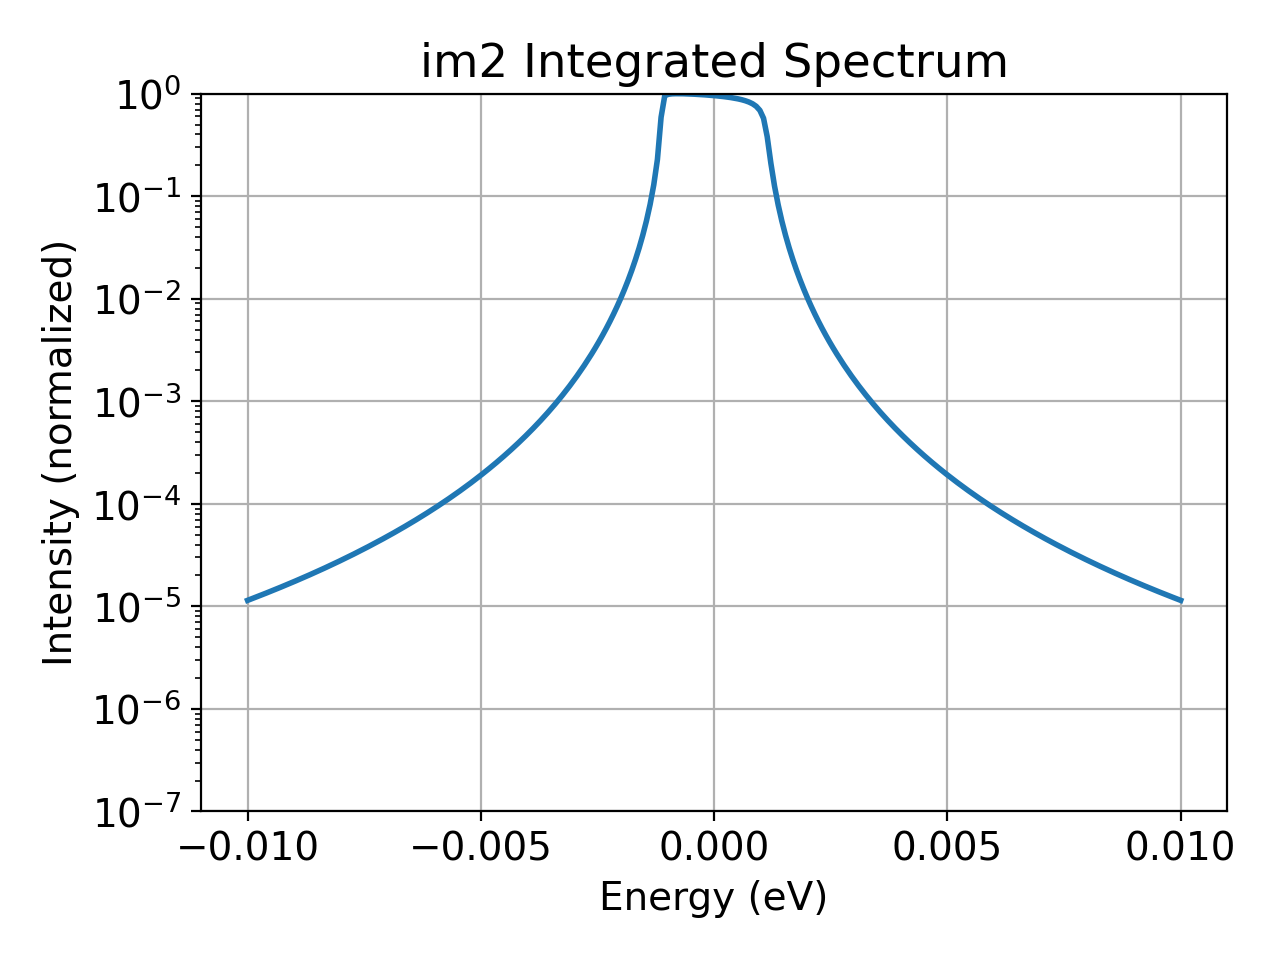

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1724: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-.05,1.3)


<IPython.core.display.Javascript object>


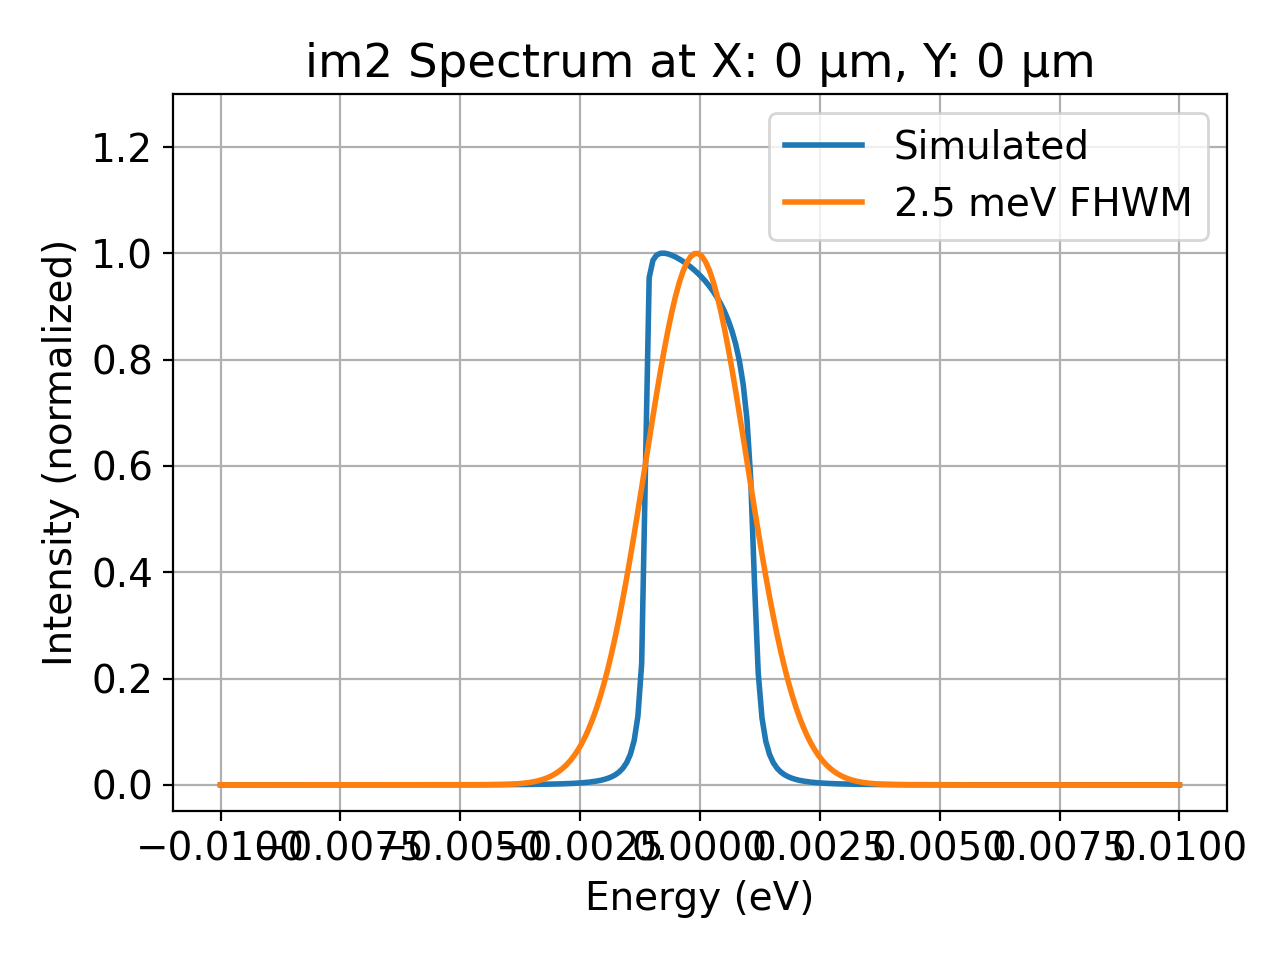

<IPython.core.display.Javascript object>


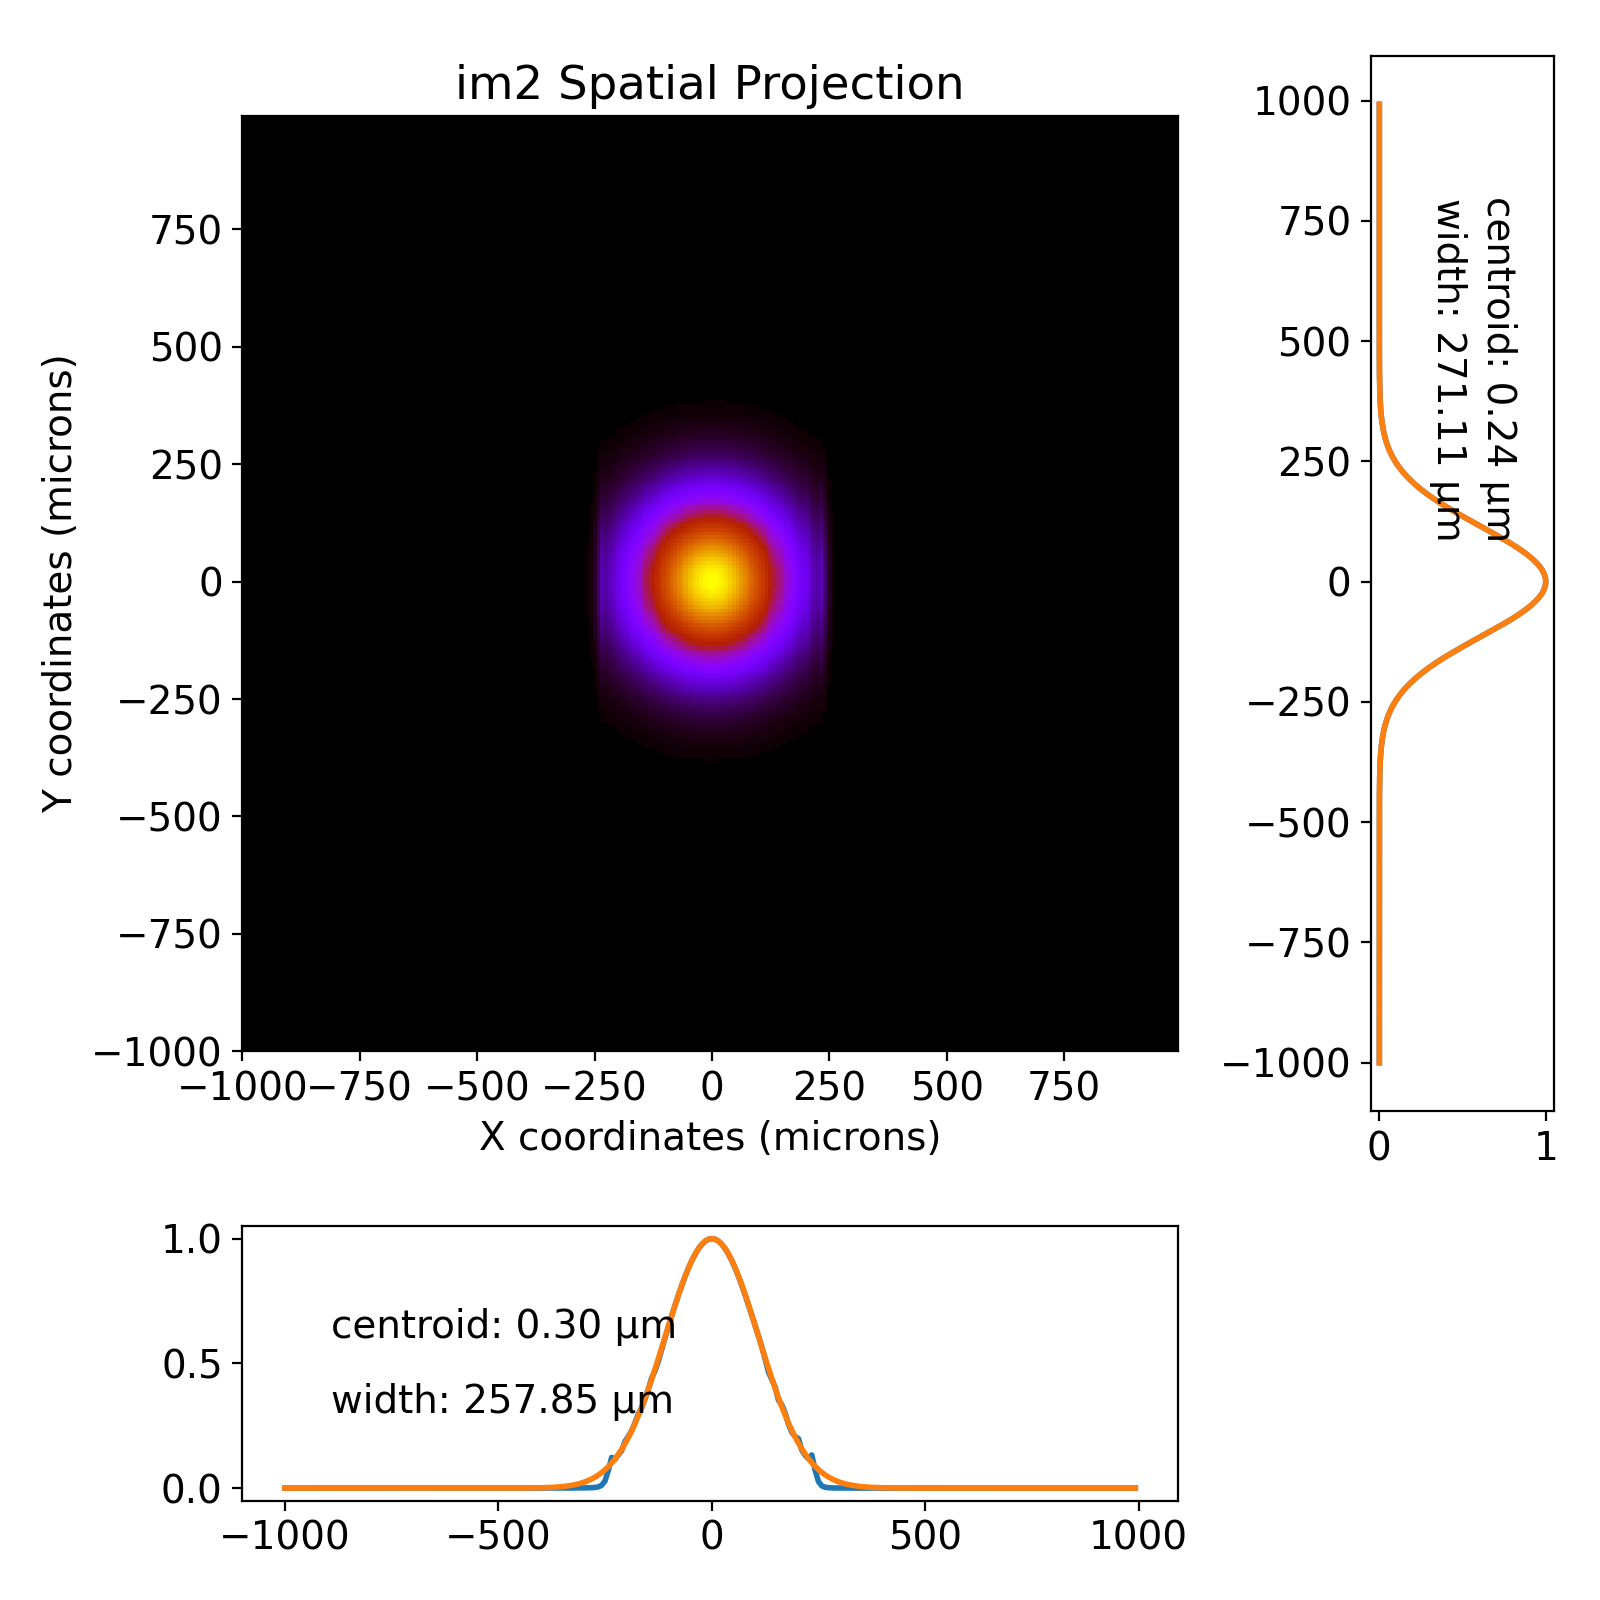

<IPython.core.display.Javascript object>


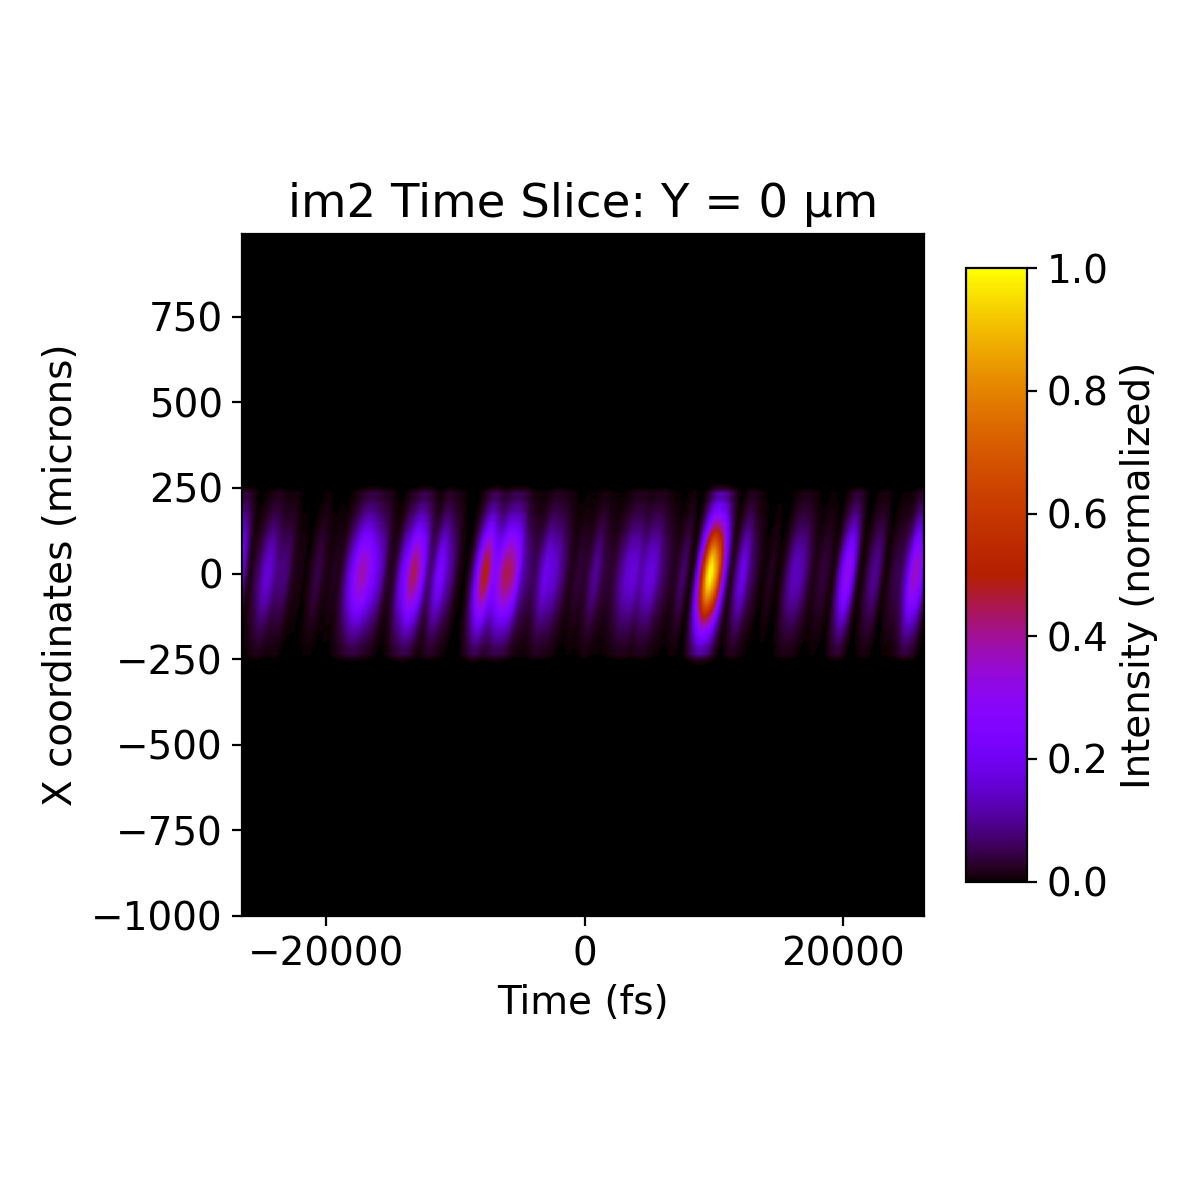

<AxesSubplot:title={'center':'im2 Time Slice: Y = 0 μm'}, xlabel='Time (fs)', ylabel='X coordinates (microns)'>

In [48]:
fig_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Projects/Tunable Mono/figures/'

pulse.plot_spectrum('im0', log=True)
pulse.plot_pulse('im0')
# plot input pulse at beam center
pulse.plot_pulse('im2')
# plt.savefig(fig_path+'input_pulse_slit.png')
# plot input spectrum at beam center
pulse.plot_spectrum('im2')
ax = pulse.plot_spectrum('im2', log=True,integrated=True, show_fit=False)
# plt.savefig(fig_path+'six_bounce_tails.png')
# ax.semilogy(pulse.energy-pulse.E0,(5e-5/2)**2/((pulse.energy-pulse.E0)**2+(5e-5/2)**2))
ax.set_ylim(1e-7,1)
pulse.plot_spectrum('im2')
# plt.savefig(fig_path+'input_spectrum_slit.png')
# plot input beam spatial projection
pulse.imshow_projection('im2')
# plt.savefig(fig_path+'input_spatial_slit.png')

pulse.imshow_time_slice('im2')

In [12]:
# plot energy slice of focus
pulse.imshow_energy_slice('focus')
# plt.savefig(fig_path+'option1_focus_energy.png')
# plot time slice of focus
pulse.imshow_time_slice('focus', shift=-1000)
# plt.savefig(fig_path+'option1_focus_time.png')
# show spatial projection
pulse.imshow_projection('focus')
# plt.savefig(fig_path+'option1_focus_spatial.png')

KeyError: 'focus'

### Visualize output

<IPython.core.display.Javascript object>


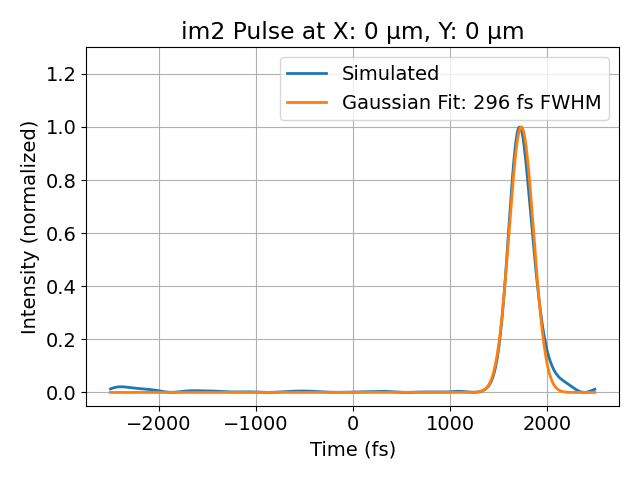

<IPython.core.display.Javascript object>


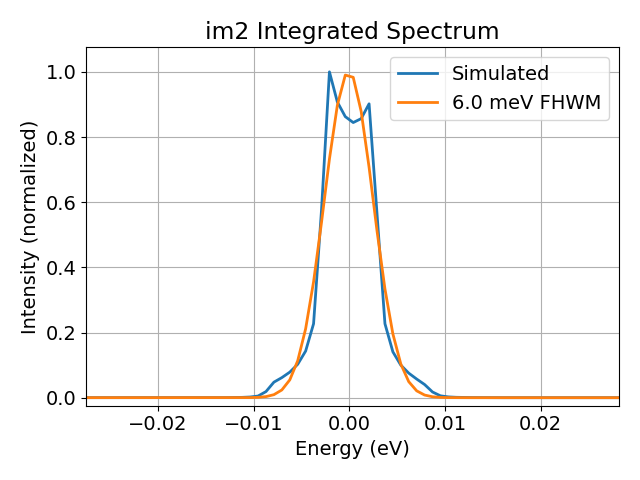

<IPython.core.display.Javascript object>


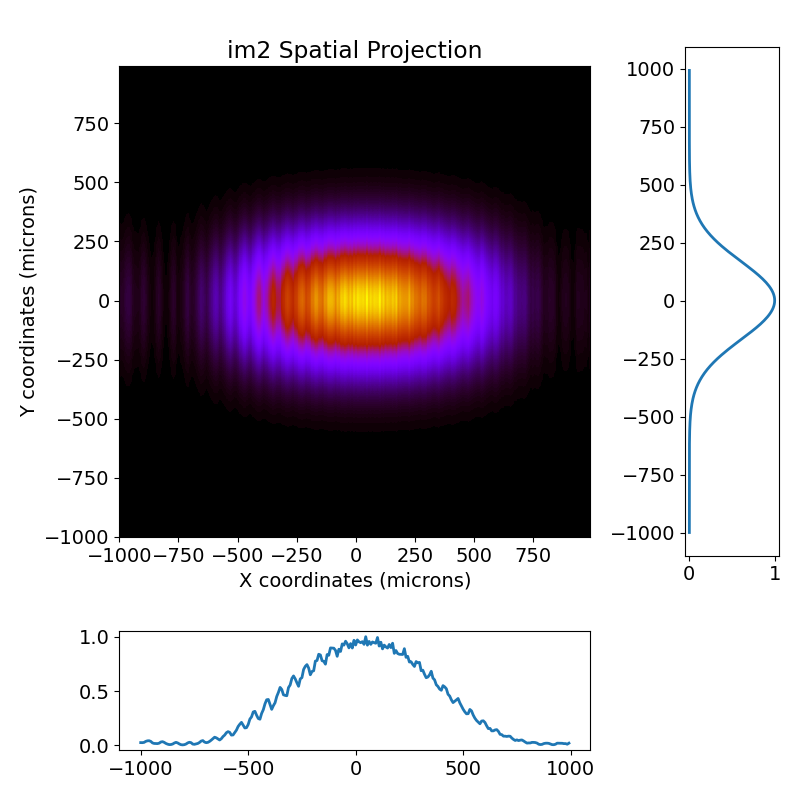

<IPython.core.display.Javascript object>


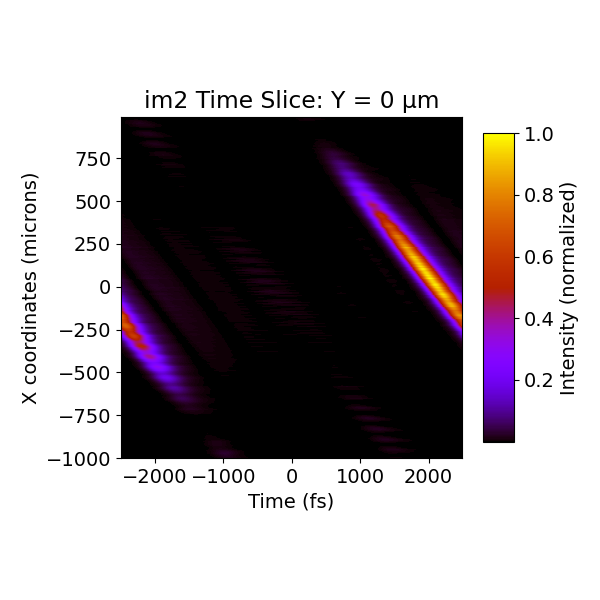

<IPython.core.display.Javascript object>


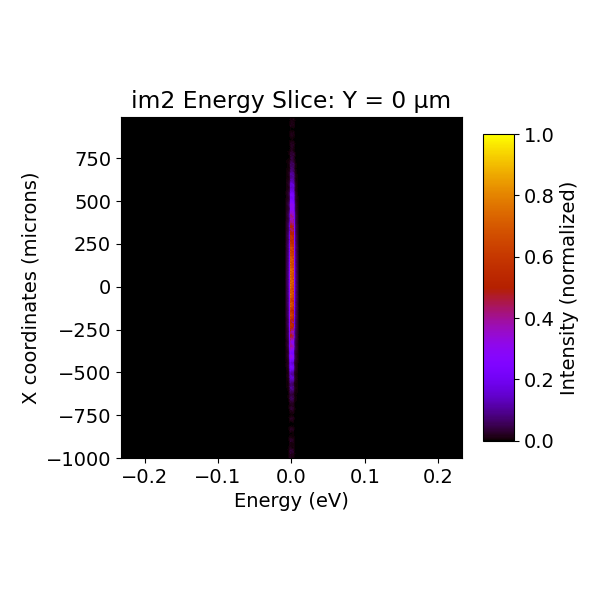

<IPython.core.display.Javascript object>


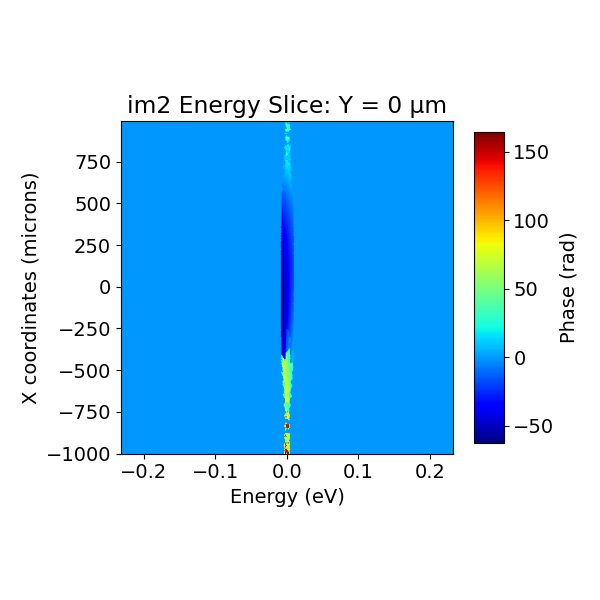

-1.9600235413834752
0.006083953350565837
0.0013993140271543732
17794.999902169413
0.054301999488864466


In [21]:
# plot output pulse at beam center
pulse.plot_pulse('im2', shift=0)
# plt.savefig(fig_path+'option1_output_pulse.png')
# plot output spectraum at beam center
pulse.plot_spectrum('im2', integrated=True, log=False)
# plt.savefig(fig_path+'option1_output_spectrum.png')
# show spatial projection of output
pulse.imshow_projection('im2')
# plt.savefig(fig_path+'option1_output_spatial.png')
# show time slice of output
pulse.imshow_time_slice('im2', shift=400)
# plt.savefig(fig_path+'option1_output_time.png')
# show energy slice of output
pulse.imshow_energy_slice('im2')
# plt.savefig(fig_path+'option1_output_energy.png')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')

print(pulse.pulsefront_tilt('im2'))
print(pulse.pulse_bandwidth('im2'))
print(pulse.throughput('im0','im2'))
print(pulse.central_energy('im2'))

print(pulse.pulse_bandwidth('im2')/pulse.pulse_bandwidth('im0')*.95**4)

# No slit

In [22]:
# list of devices to propagate through
devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]
# devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)


after c1: 1.1511
after c2: -0.0002
after c3: -1.1513
after c4: -0.0002


## Time-domain propagation

In [23]:
# reset central photon energy
beam_params['photonEnergy'] = 17795

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=100, time_window=5000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 112


In [24]:
%%capture cap
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im0','focus','im2'])

### Visualize input

<IPython.core.display.Javascript object>


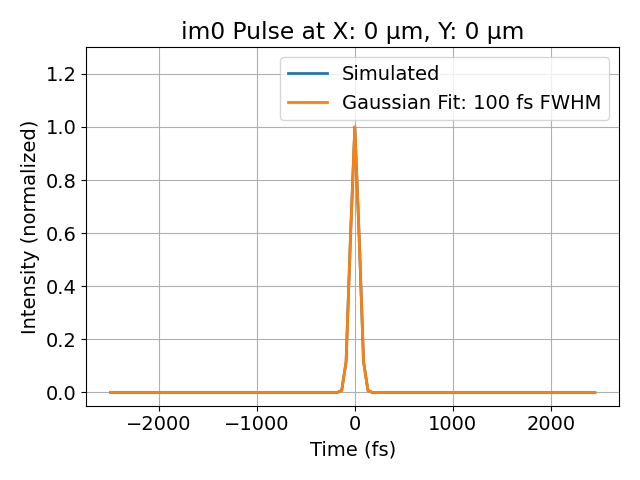

<IPython.core.display.Javascript object>


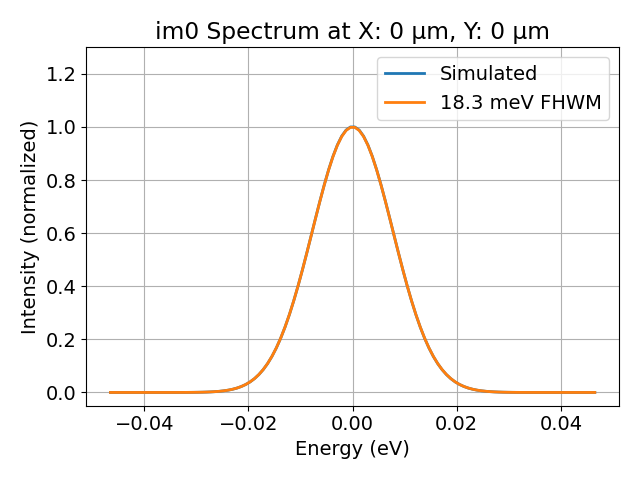

<IPython.core.display.Javascript object>


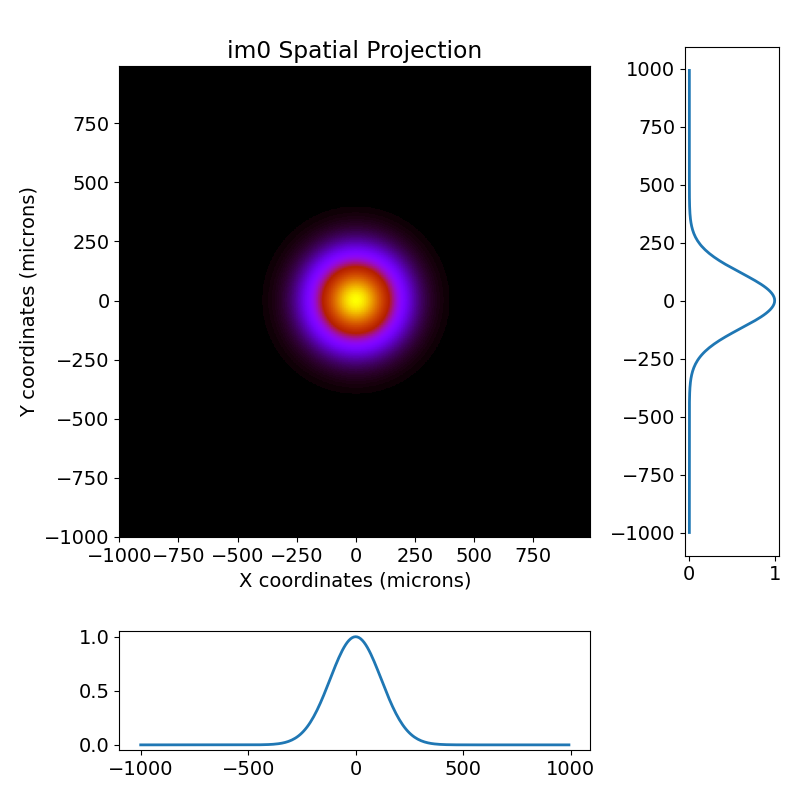

(<matplotlib.axes._subplots.AxesSubplot at 0x12b2c21d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12b611b00>)

In [25]:
fig_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/Tunable Mono/figures/'

# plot input pulse at beam center
pulse.plot_pulse('im0')
# plt.savefig(fig_path+'input_pulse_no_slit.png')
# plot input spectrum at beam center
pulse.plot_spectrum('im0')
# plt.savefig(fig_path+'input_spectrum_no_slit.png')
# plot input beam spatial projection
pulse.imshow_projection('im0')
# plt.savefig(fig_path+'input_spatial_no_slit.png')

### Visualize focus properties

<IPython.core.display.Javascript object>


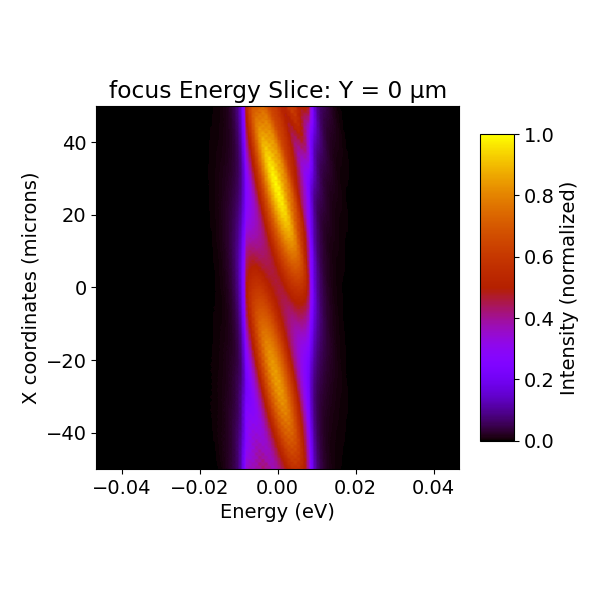

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1281: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6))


<IPython.core.display.Javascript object>


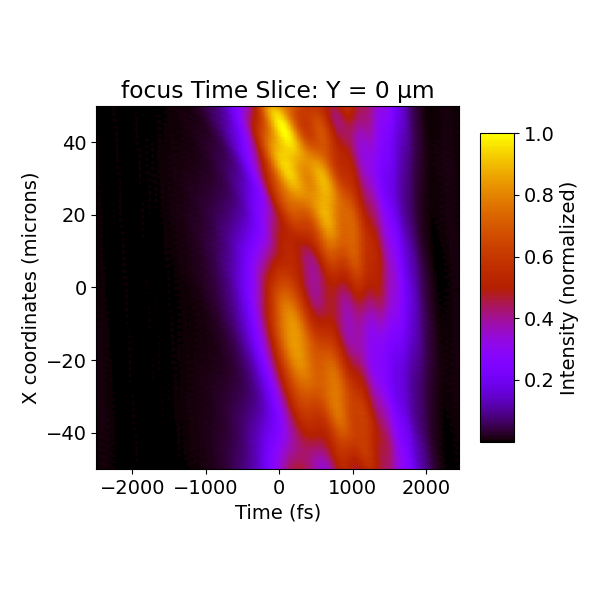

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


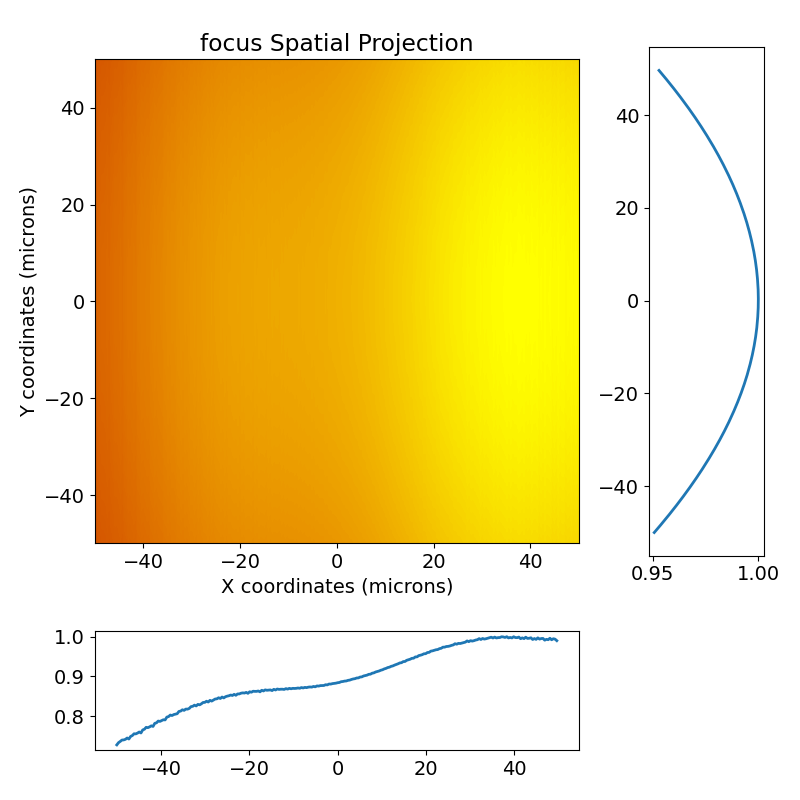

(<matplotlib.axes._subplots.AxesSubplot at 0x12b7512e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12b784b00>)

In [26]:
# plot energy slice of focus
pulse.imshow_energy_slice('focus')
# plt.savefig(fig_path+'option1_focus_energy_no_slit.png')
# plot time slice of focus
pulse.imshow_time_slice('focus', shift=-1000)
# plt.savefig(fig_path+'option1_focus_time_no_slit.png')
# show spatial projection
pulse.imshow_projection('focus')
# plt.savefig(fig_path+'option1_focus_spatial_no_slit.png')

### Visualize output

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1836: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


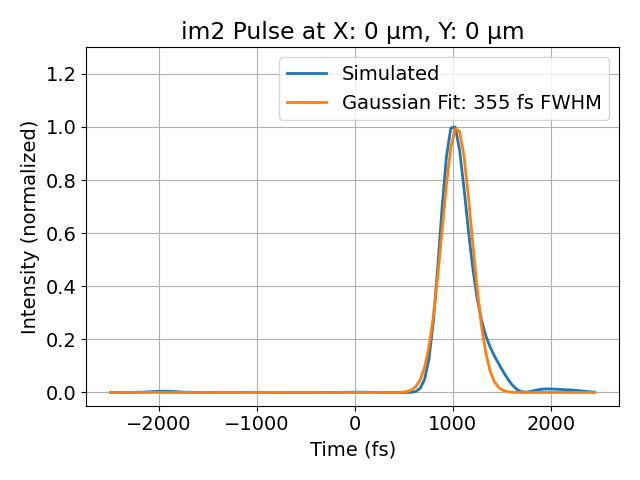

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1457: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


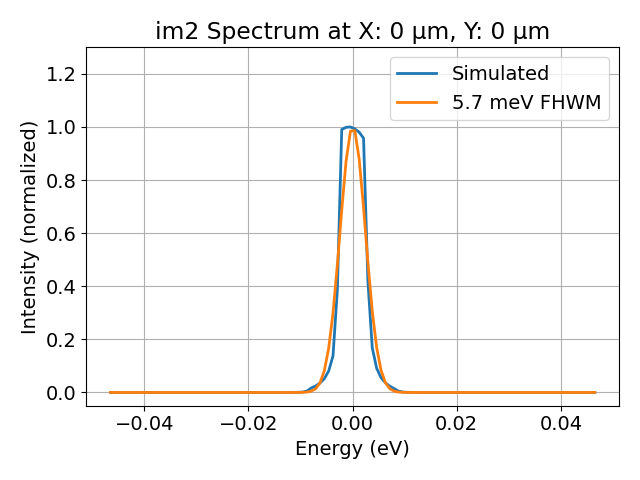

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


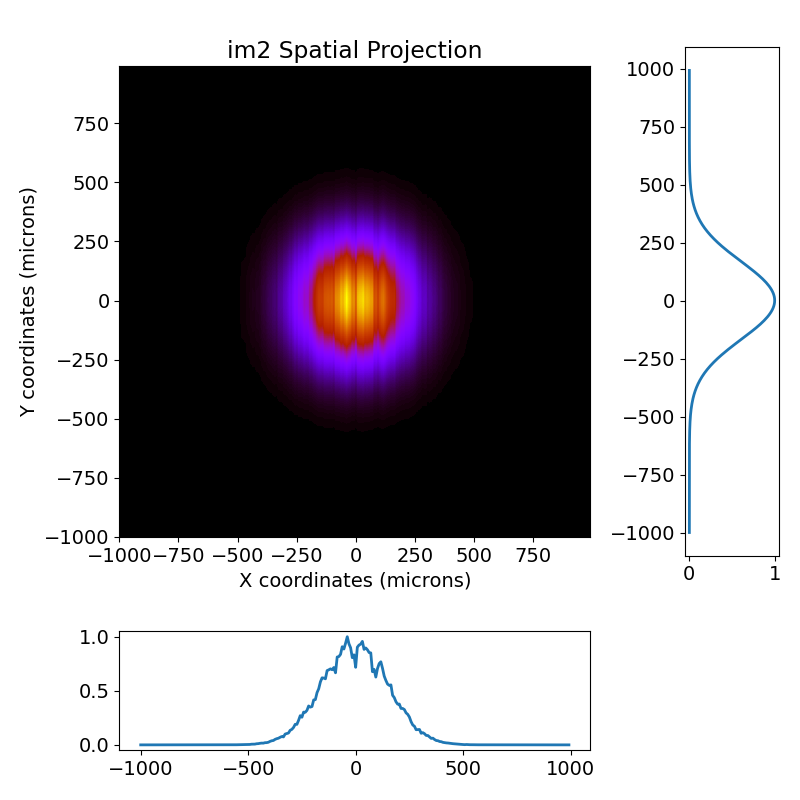

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1281: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6))


<IPython.core.display.Javascript object>


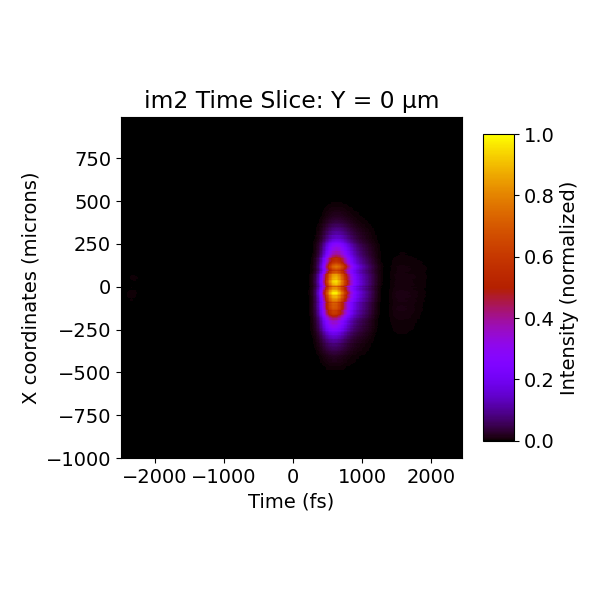

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1189: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


<IPython.core.display.Javascript object>


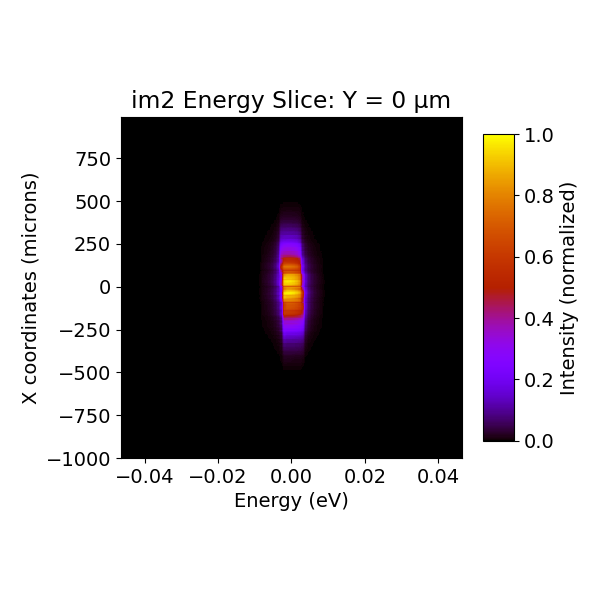

<IPython.core.display.Javascript object>


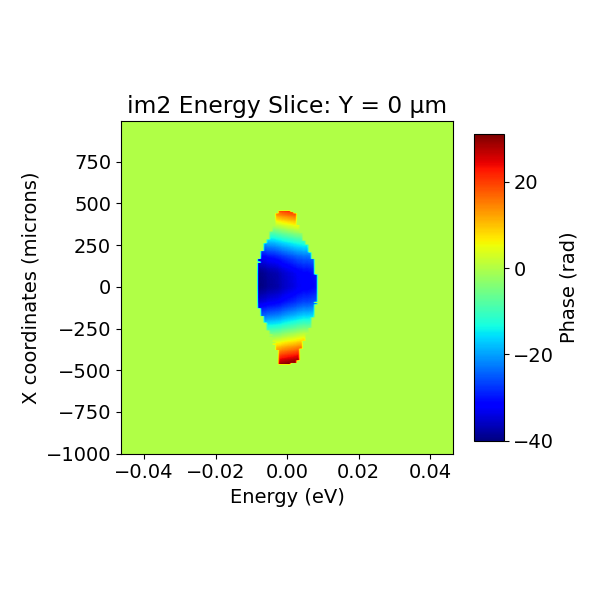

(16.84393633873648, 355)
[2.88       2.88014286 2.88028571 2.88042857 2.88057143 2.88071429
 2.88085714 2.881      2.88114286 2.88128571 2.88142857 2.88157143
 2.88171429 2.88185714 2.882      2.88214286 2.88228571 2.88242857
 2.88257143 2.88271429 2.88285714 2.883      2.88314286 2.88328571
 2.88342857 2.88357143 2.88371429 2.88385714 2.884      2.88414286
 2.88428571 2.88442857 2.88457143 2.88471429 2.88485714 2.885
 2.88514286 2.88528571 2.88542857 2.88557143 2.88571429 2.88585714
 2.886      2.88614286 2.88628571 2.88642857 2.88657143 2.88671429
 2.88685714 2.887     ]


In [27]:
# plot output pulse at beam center
pulse.plot_pulse('im2', shift=600)
# plt.savefig(fig_path+'option1_output_pulse_no_slit.png')
# plot output spectraum at beam center
pulse.plot_spectrum('im2')
# plt.savefig(fig_path+'option1_output_spectrum_no_slit.png')
# show spatial projection of output
pulse.imshow_projection('im2')
# plt.savefig(fig_path+'option1_output_spatial_no_slit.png')
# show time slice of output
pulse.imshow_time_slice('im2', shift=200)
# plt.savefig(fig_path+'option1_output_time_no_slit.png')
# show energy slice of output
pulse.imshow_energy_slice('im2')
# plt.savefig(fig_path+'option1_output_energy_no_slit.png')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')
print(pulse.pulse_duration('im2'))
f1 = np.linspace(2.88, 2.887, 50)
print(f1)

In [152]:
def define_devices(f1, f2):
    # crystal asymmetry angle
    alphaAsym = 27.98*np.pi/180

    # distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
#     f1 = 9.822
#     # distance between CRLs and focus
#     f2 = 10

    # crystal reflection hkl index
    hkl = [6,6,0]

    # initialize the beam
    b1 = beam.Beam(beam_params=beam_params)

    # viewing point upstream of monochromator
    im0 = optics.PPM('im0', z=870, FOV=2e-3, N=256)
    crl0 = optics.CRL('crl0', z=930, roc=660e-6, diameter=2e-3)

    # first crystal: symmetric reflection
    crystal1 = optics.Crystal('c1', hkl=hkl, length=10e-2, width=20e-3, z=931, E0=E0,
                              alphaAsym=0, orientation=0, pol='s', delta=0.e-6)

    # second crystal: asymmetric reflection, orientation flipped relative to crystal1
    crystal2 = optics.Crystal('c2', hkl=hkl, length=10e-2, width=20e-3, z=crystal1.z+.2, E0=E0,alphaAsym=alphaAsym, 
                              orientation=2,pol='s', delta=0e-6)
    # printing crystal incidence and reflection angles for confirmation
    print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
    print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

    im_upstream = optics.PPM('im_upstream', z=crystal2.z + f1 - .1, FOV=2e-3, N=256)

    # CRL with ~1 meter focal length (modeled as single element for now)
    crl1 = optics.CRL('crl1', z=crystal2.z+f1, roc=21e-6, diameter=5e-3)

    # viewing point downstream of first crl
    im1 = optics.PPM('im1', z=crl1.z+.1,N=256,FOV=2e-3)

    # viewing point at focus
    focus = optics.PPM('focus', z=crl1.z+f2, FOV=100e-6, N=256)

    # slit at focus
    slit = optics.Slit('slit', z=crl1.z+f2 + 1e-3, x_width=8e-6, y_width=2e-3)

    # second CRL with ~1 meter focal length, for collimation
    crl2 = optics.CRL('crl2', z=crl1.z+2*f2, roc=21e-6, diameter=5e-3)

    # third crystal, symmetric reflection, same orientation as crystal2
    crystal3 = optics.Crystal('c3', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+2, E0=E0,alphaAsym=0, orientation=2,
                             asym_type='emergence',pol='s')

    # fourth crystal, asymmetric reflection, same orientation as crystal1
    crystal4 = optics.Crystal('c4', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+2 + (f1-2)*np.cos(crystal1.beta0*2), E0=E0,alphaAsym=-alphaAsym, 
                              asym_type='emergence', orientation=0,pol='s')

    # viewing point just downstream of monochromator
    im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

    # list of devices to propagate through
    devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]
    # devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]
    
    return devices

In [153]:
%%capture capt
f1 = np.linspace(9.822-.1, 9.822+.1, 50)

duration = np.zeros(50)

for i, f in enumerate(f1):
    
    devices = define_devices(f, 10)
    # initialize beamline
    mono_beamline = beamline.Beamline(devices)
    # reset central photon energy
    beam_params['photonEnergy'] = 17795

    # initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
    pulse = beam.Pulse(beam_params=beam_params, tau=100, time_window=4000)

    print('Number of spectral components: {:d}'.format(pulse.N))
    pulse.propagate(beamline=mono_beamline, screen_names=['im2'])
    centroid, duration[i] = pulse.pulse_duration('im2')

<IPython.core.display.Javascript object>


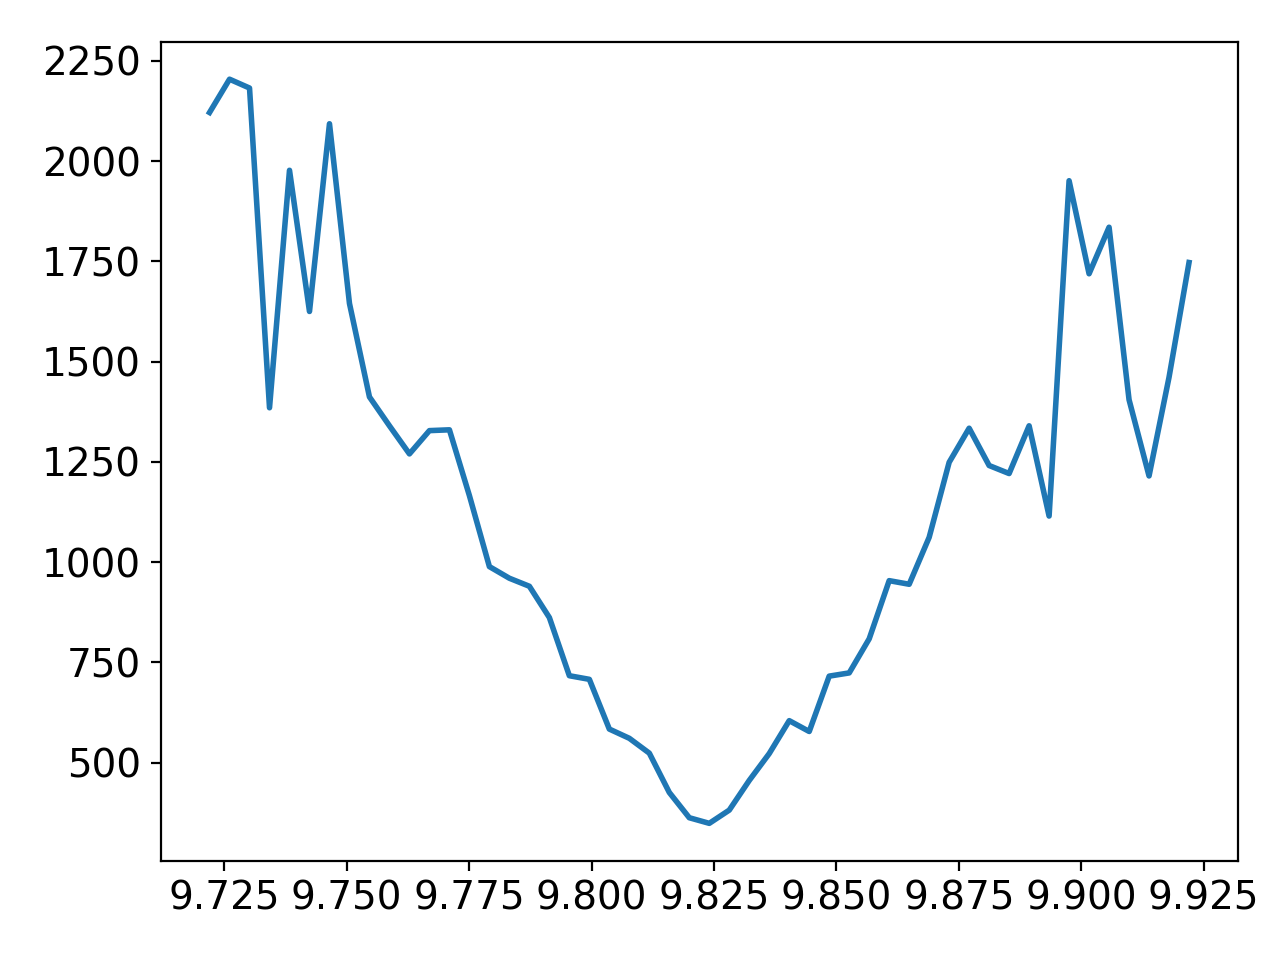

In [154]:
plt.figure()
plt.plot(f1, duration)

In [2]:
lambda0 = 1239.8/9000*1e-9
phase = 80
path = phase*lambda0/2/np.pi

In [3]:
print(path)

1.7539582084029499e-09


In [8]:
1/(1/6+1/3)

2.0

In [34]:
37/20

1.85

In [11]:
400/8

50.0

In [32]:
9*2/20

0.9

In [45]:
np.pi*(10e-6)**2/b1.lambda0

4.509166097001966

In [47]:
1.18385e-5*18**(-.829988)

1.0750670778663879e-06

In [50]:
x = 18
y = -3.6959e-6*x**6 + 2.787e-4*x**5 - 7.8487e-3*x**4 + 1.088e-1*x**3 - 1.057*x**2 + 9.881*x - 73.1

In [51]:
print(y)

-26.196708281599996
